In [46]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("bigmartsales.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [5]:
data.shape

(8523, 12)

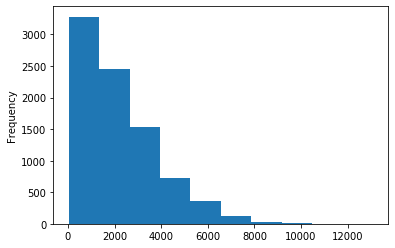

In [44]:
data["Item_Outlet_Sales"].plot.hist()

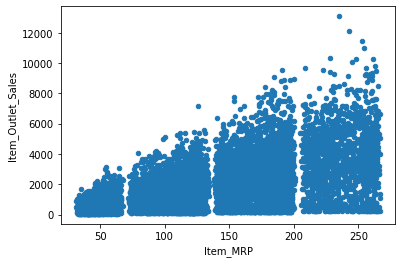

In [45]:
data.plot.scatter("Item_MRP","Item_Outlet_Sales")

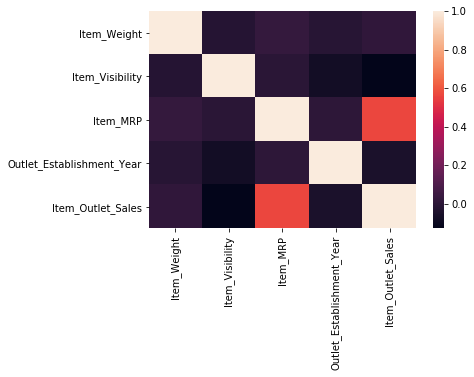

In [47]:
sns.heatmap(data.corr())

In [42]:
train=data[0:7999]

In [8]:
test=data[800:]

In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
800,NCN41,17.00,Low Fat,0.052166,Health and Hygiene,125.0730,OUT013,1987,High,Tier 3,Supermarket Type1,1108.5570
801,FDA47,10.50,Regular,0.000000,Baking Goods,162.4210,OUT045,2002,NaN,Tier 2,Supermarket Type1,1304.9680
802,NCD19,8.93,Low Fat,0.000000,Household,55.4614,OUT045,2002,NaN,Tier 2,Supermarket Type1,331.5684
803,FDO36,NaN,Low Fat,0.077537,Baking Goods,180.8660,OUT027,1985,Medium,Tier 3,Supermarket Type3,3235.7880
804,FDH20,16.10,Regular,0.024928,Fruits and Vegetables,95.1410,OUT013,1987,High,Tier 3,Supermarket Type1,3089.3120


In [12]:
x_train=train.drop("Item_Outlet_Sales",axis=1) 

In [13]:
y_train=train["Item_Outlet_Sales"] 


In [14]:
x_test=test.drop("Item_Outlet_Sales",axis=1)

In [17]:
true_p=test["Item_Outlet_Sales"]

In [18]:
lreg=LinearRegression()

In [27]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
x_train=pd.get_dummies(x_train)

In [21]:
x_train.shape


(7999, 1604)

In [22]:
x_test=pd.get_dummies(x_test)

In [23]:
x_test.shape

(7723, 1604)

In [25]:
x_train.fillna(0,inplace=True)

In [26]:
x_test.fillna(0,inplace=True)

In [29]:
pred=lreg.predict(x_test)

In [30]:
lreg.score(x_test,true_p)

0.6357597889921525

In [31]:
lreg.score(x_train,y_train)

0.6497748738731095

In [34]:
rmse_Test=np.sqrt(np.mean(np.power((np.array(true_p)-np.array(pred)),2))) #rmse for test dataset

In [35]:
rmse_train=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))

In [38]:
print(rmse_Test)
print(rmse_train)

1027.090784808217
1013.002181813114
